# PCA Review and K-means Clustering

* Revisit PCA
    * Visualization of principal components
* Unsupervised learning
    * Clustering with K-means
    * Digits dataset: Identifying different kinds of 1s
    * Using K-means in conjunction with PCA

We begin by extending the PCA analysis from last time to include more than two principal components:

In [5]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)

In [9]:
digits_2D = pca.fit_transform(digits.data)

In [10]:
pc1 = pca.components_[0,:]
pc2 = pca.components_[1,:]

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

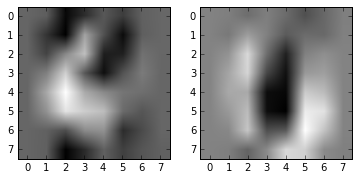

In [13]:
plt.subplot(1,2,1)
plt.imshow(pc1.reshape(8,8),cmap='binary')
plt.subplot(1,2,2)
plt.imshow(pc2.reshape(8,8),cmap='binary');

The first 2 principal components look like a three and an inverted (why) zero. We've transformed our dataset from 64 dimensions down to 2 dimensions by means of PCA and can see how the 3s are to the right along the first principal component and the 0s are below along the second principal component (it's below because the second principal component is a zero with inverted colors).

<function matplotlib.pyplot.colorbar>

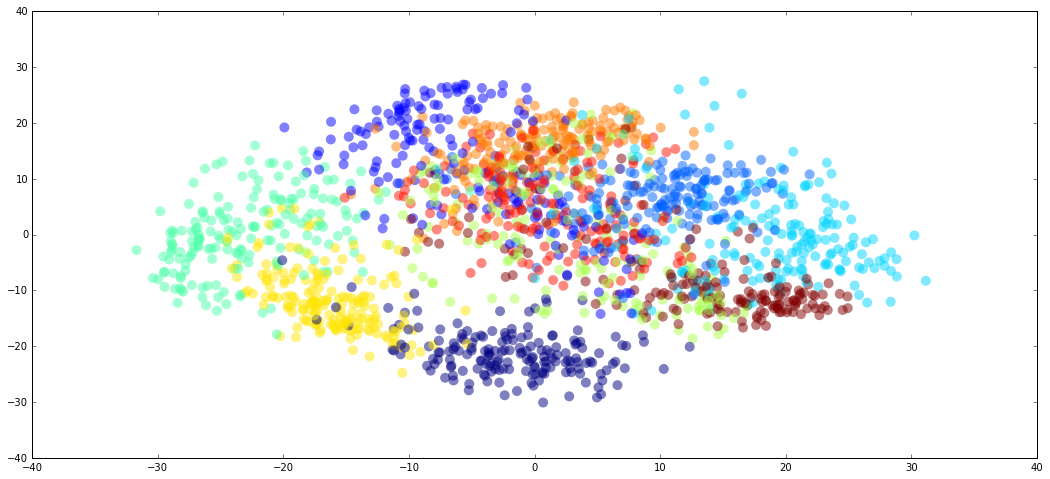

In [14]:
plt.figure(figsize=(18,8))
plt.scatter(digits_2D[:,0],digits_2D[:,1],c=digits.target,s=100,lw=0,alpha=0.5);
plt.colorbar

We procede by writing code that will find the first N principal components and display the images. Notice that the first three principal components look like 3, 2 and 0, but features get unclear for subsequent components (why?)

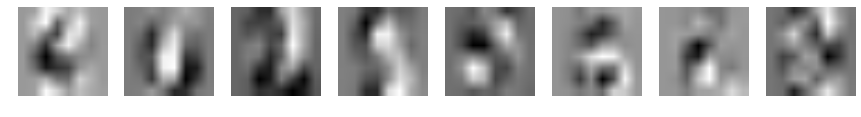

In [15]:
N = 8
pca_ND = PCA(n_components=N)
plt.figure(figsize=(15,10))
pca_ND.fit(digits.data)
pc = pca_ND.components_
plt.subplot(1,N,1)
for n in range(0,N):
    plt.subplot(1,N,n+1)
    plt.imshow(pc[n,:].reshape(8,8),cmap='gray')
    plt.axis('off')

#### Unsupervised Learning

So far, the seminar has involved supervised learning. For instance, the digits dataset is labelled with the correct digit. If we now were to consider the question of 'how many ways do people write a given digit,' we would be considering an *unsupervised* learning problem because we don't know for example how many kinds of 1s are there to be found a priori. To this end, we will use a clustering algorithm to discern whether there are naturally occurring classes within a dataset.

Let's begin with the number 1.

In [16]:
ones = digits.data[digits.target == 1]

We'll visualize the 1s using PCA.

In [17]:
pca_ones = PCA(n_components=2)
ones_2D = pca_ones.fit_transform(ones)

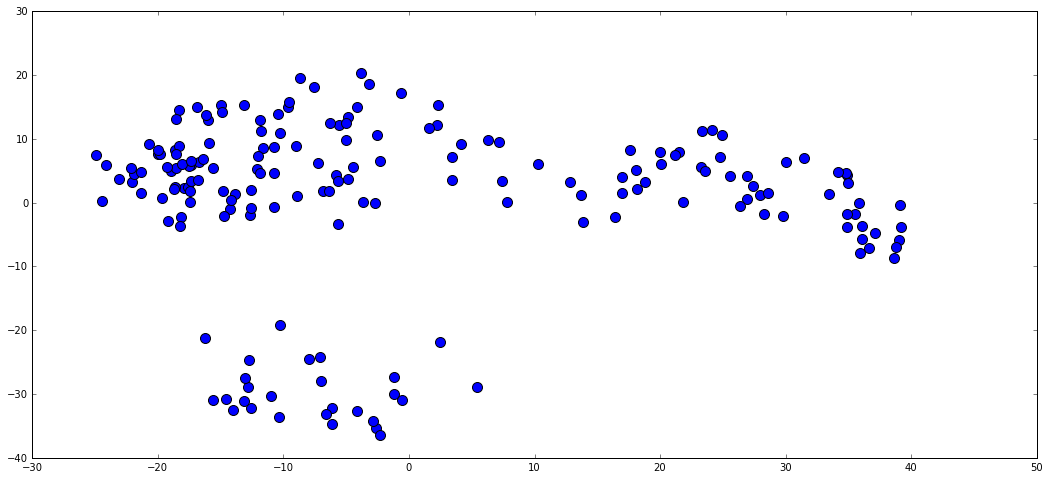

In [18]:
plt.figure(figsize=(18,8))
plt.scatter(ones_2D[:,0],ones_2D[:,1],s=100);

From the above plot we can clean that there are 3 clusters of the digit one. We shall now use [KmMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to find them. This algorithm works in the following way:

1. Choose the number of clusters N.
2. Choose N random points in the dataset, call them the K-means (or cluster centers).
3. Classify all the points in the dataset according to the closest K-means.
4. For each cluster, calculate the average over the cluster and set those as the new K-means.
5. Iterate over steps 3-4 until the K-means stabilize within a user-specified tolerance.

In [19]:
from sklearn.cluster import KMeans

In [20]:
N = 3
ones_km = KMeans(n_clusters=N)

In [21]:
ones_km.fit(ones)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Having computed the K-means, these can be accessed using the .cluster_centers_method.

In [22]:
clusters = ones_km.cluster_centers_

In [23]:
clusters.shape

(3L, 64L)

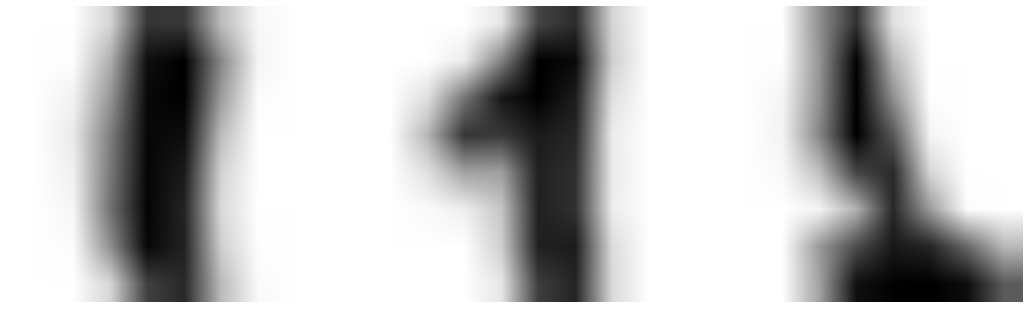

In [24]:
plt.figure(figsize=(18,10))
plt.subplot(1,N,1)
for n in range (0,N):
    plt.subplot(1,N,n+1)
    plt.imshow(clusters[n,:].reshape(8,8),cmap='binary')
    plt.axis('off')

The above figure clearly shows the 3 kinds of ones which, according to our training dataset, are the 3 distinct kinds of ones from the original dataset! We shall now extend the methodology for all digits. In doing so, we shall find that some digits seem to have fewer than 3 natural clusters. For instance, {0,2,3,5,6,8} exhibit one natural cluster whereas {4,7,9} have one and only {1} has 3 natural clusters.

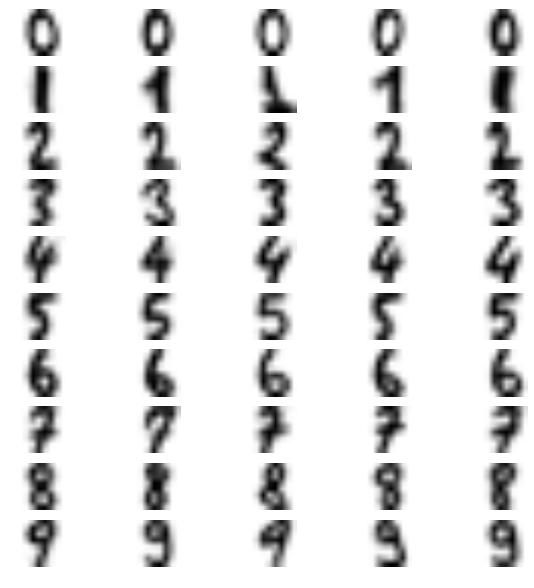

In [25]:
N = 5
plt.figure(figsize=(10,10))
plt.subplot(10,N,1)
for n in range(0,10):
    this_digit = digits.data[digits.target == n]
    km = KMeans(n_clusters = N)
    km.fit(this_digit)
    kinds_of_this_digit = km.cluster_centers_
    for m in range(0,N):
        plt.subplot(10,N,n*N+m+1)
        plt.imshow(kinds_of_this_digit[m,:].reshape(8,8),cmap='binary')
        plt.axis('off')
plt.show()

It seems that we need to look for 5 or more clusters to see the two distinct kinds of 7s...

In what follows we shall combine KMeans with PCA:

1. Collect all the 4s
2. Use KMeans to find 3 clusters
3. Classify all the 4s by these 3 clusters
4. Use PCA to plot the 4s in 2D with colors according to the labels from Session #3

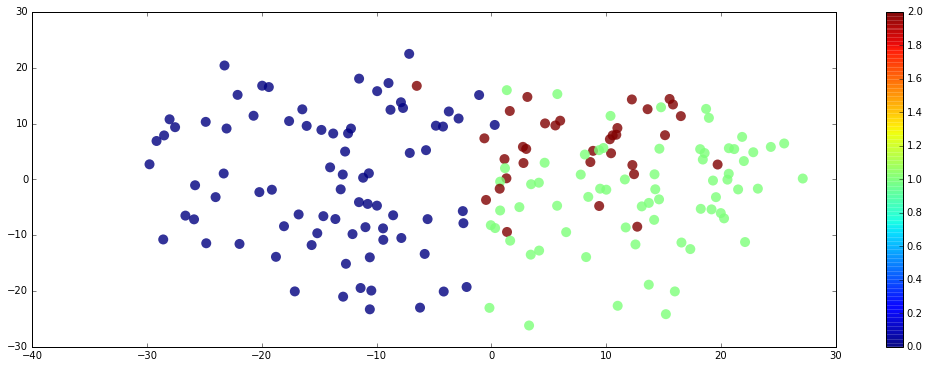

In [26]:
fours = digits.data[digits.target == 4]
km = KMeans(n_clusters = 3)
km.fit(fours)
targets = km.predict(fours)
pca = PCA(n_components=2)
fours_2D = pca.fit_transform(fours)
plt.figure(figsize=(18,6))
plt.scatter(fours_2D[:,0],fours_2D[:,1],c=targets, s=100,lw=0,alpha=0.8)
plt.colorbar();

So the three colors from the PCA analysis clearly show the clustering of the distinct kinds of {4} obtained from the KMeans clustering. (wow, I actually understood what we've done! :D )

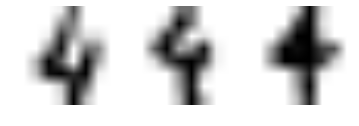

In [28]:
plt.subplot(1,3,1)
plt.imshow(fours[0,:].reshape(8,8),cmap='binary')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(fours[5,:].reshape(8,8),cmap='binary')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(fours[13,:].reshape(8,8),cmap='binary')
plt.axis('off');